In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
data = pd.read_csv("music.csv")

In [20]:
data.shape

(1000, 28)

In [21]:
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,1.935690,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,...,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,blues
1,blues.00001.wav,0.340983,-0.058070,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,...,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,1.033480,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,...,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.078957,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,...,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,-8.457873,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,...,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,blues


In [22]:
data['label'].value_counts()

hiphop       100
reggae       100
country      100
rock         100
jazz         100
classical    100
pop          100
metal        100
blues        100
disco        100
Name: label, dtype: int64

In [23]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['label']= label_encoder.fit_transform(data['label']) 
data['filename']=label_encoder.fit_transform(data['filename'])  
data['label'].unique() 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
X = data.drop('label', axis=1)
X= data.drop('filename',axis=1)
y = data['label']

In [25]:
X.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.349943,1.935690,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,42.351029,...,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,0
1,0.340983,-0.058070,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,35.874684,...,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,0
2,0.363603,1.033480,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,31.689014,...,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,0
3,0.404779,0.078957,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,26.871927,...,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233,0
4,0.308590,-8.457873,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,22.153301,...,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,0


In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

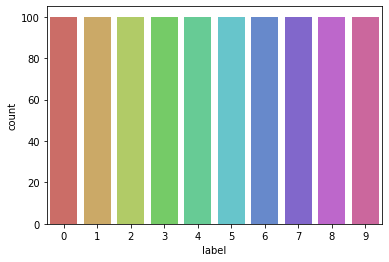

In [27]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.countplot(x='label' , data= data, palette = 'hls')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [29]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
y_pred = svclassifier.predict(X_test)



In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 0  0  0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  1  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0 21  0]
 [ 0  0  0  0  0  0  4  0 13  0]
 [ 0  0  0  0  0  0  0  1 19  0]
 [ 0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0 21  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        27
           4       1.00      0.05      0.10        19
           5       0.00      0.00      0.00        21
           6       1.00      0.24      0.38        17
           7       1.00      0.05      0.10        20
           8       0.07      1.00      0.13        13
           9       0.00      0.00      0.00        21

    accuracy                           0.10       200
   macro avg       

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
from sklearn.metrics import confusion_matrix 
confmat = confusion_matrix(y_test,y_pred)
print(confmat)

[[ 0  0  0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  1  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0 21  0]
 [ 0  0  0  0  0  0  4  0 13  0]
 [ 0  0  0  0  0  0  0  1 19  0]
 [ 0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0 21  0]]


(10.0, 0.0)

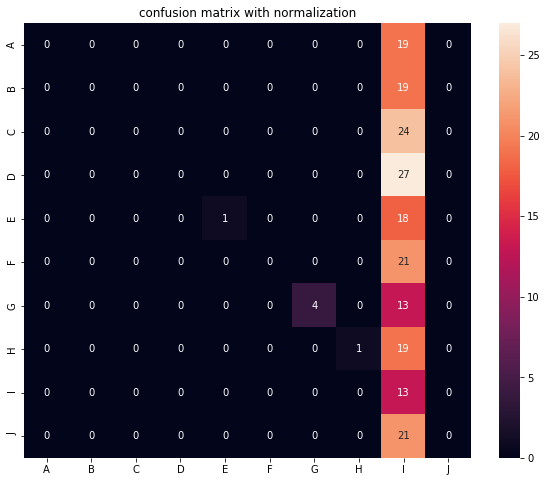

In [33]:
import numpy as np
from numpy import linalg as LA 
import seaborn as sn

df_cm = pd.DataFrame(confmat , index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix with normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)